# Seattle AirBnB Data Analysis


Analysis of public data provided by AirBnB can provide useful business insights.
The company can provide the people thinking to join as hosts with useful insights about the revenu potential of their property and with tools that can predict the rental price based on objective characteristics of the property, such as number of bedrooms, amenities, and property location.

In this notebook the available data (https://www.kaggle.com/airbnb/seattle) will be loaded, cleaned, the new characteristics wil be computed and added. Then the following insightes will be obtained and illustrated:
- What is the Estimated Property revenue in different Seattle neighbourhoods?
- What are the busiest months for renters?
- 


In [775]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

## Listings data 
Seem to be most informative, so let's start with reading and preliminary analysis

In [776]:
listings_df = pd.read_csv('data/listings.csv')
listings_df.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15


In [777]:
# Number of rows 
listings_df.shape[0]

3818

In [778]:
# Get info about columns. Those with number of non-null object less than n_rows contain NaN values  
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

I need to convert string data in 'price' column into integers (rounded to dollar amount)
But because of dollar sign `$` and comma characters present in strings, the simple .astype() method won't work.
First strip these strings of '$'and ',', then apply .astype() transform
(https://stackoverflow.com/questions/32464280/converting-currency-with-to-numbers-in-python-pandas recipe)

In [779]:
dollar_amount_cols = ['security_deposit', 'price', 'cleaning_fee']
for col in dollar_amount_cols:
    listings_df[col] = listings_df[col].str.replace("[$,]", "").astype("float")

listings_df[dollar_amount_cols]

,security_deposit,price,cleaning_fee
0,NaN,85.0,NaN
1,100.0,150.0,40.0
2,1000.0,975.0,300.0
3,NaN,100.0,NaN
4,700.0,450.0,125.0
5,NaN,120.0,40.0
6,150.0,80.0,NaN
7,150.0,60.0,25.0
8,NaN,90.0,NaN
9,100.0,150.0,40.0


Several columns have apparent True/False values, which are represent by `t`/`f` characters.
We can use `.apply()` method with a lambda function which makes the mapping to 1/0 values.
(I decided to use 1/0 instead of True/False, since later I will use these data for training a Linear model.)

In [780]:
tf_columns = ['requires_license', 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification', 'host_is_superhost']

for col in tf_columns: 
    listings_df[col] = listings_df[col].apply( lambda s: 1.0 if s=='t' else 0.0 ) 
    
listings_df[tf_columns].head(3)

,requires_license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,host_is_superhost
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0


## Reviews data

In [781]:
reviews_df = pd.read_csv('data/reviews.csv')
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [782]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


`date` column contains strings, so I convert them to datetime 

In [783]:
reviews_df['date'] = pd.to_datetime(reviews_df['date'])

In [784]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null datetime64[ns]
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 3.9+ MB


# Estimated Property Revenue

The idea of estimating the Property Revenue is taken from: 

https://towardsdatascience.com/airbnb-in-seattle-data-analysis-8222207579d7

The only data we have about the actual bookings of a property are the reviews.cvs.
This table contains all reviews from guests who stayed at a particular property, which can be identified by `listing_id`.
We can assume that each review was a result of a single booking. For each booking, a guest would stay at the property at least `minimum nights`, which is a column in `listing_df`. 
Hence, for each review we can estimate the lower bound of Property Revenue associated with this booking. 

I obtain the dataframe of bookings data by joining `reviews_df` and `listings_df` on `listing_id` and `id` correspondingly.

Then the estimated revenue of each booking can be obtained as the product of `price` and `minimum_nights` columns



In [789]:
# To make joining easier, rename id column in listings_df to listing_id, as in reviews_df 
#listings_df.rename(columns={'id':'listing_id'}, inplace=True)

In [790]:
bookings_df = pd.merge(reviews_df, listings_df, left_on='listing_id', right_on='id')

bookings_df['estimated_revenue'] = bookings_df['price'] * bookings_df['minimum_nights']
bookings_df['estimated_revenue'].head(3) 

0    150.0
1    150.0
2    150.0
Name: estimated_revenue, dtype: float64

For each property (listing), find the estimated revenue as sum of bookings estimated revenues   

In [791]:
total_revenue_per_listing_df = bookings_df[['listing_id','estimated_revenue']].groupby(['listing_id']).sum()
total_revenue_per_listing_df.head()

,estimated_revenue
listing_id,
4291,5740.0
5682,42768.0
6606,9360.0
7369,3400.0
9419,14220.0


Now we can merge `total_revenue_per_listing_df` into `listings_df`


In [792]:
listings_df = pd.merge(listings_df, total_revenue_per_listing_df, left_on='id', right_on='listing_id', how='left')

In [793]:
listings_df['estimated_revenue'].count()

3191

There is a small number of listings with no estimated revenue, we can just replace NaN values with zeros 

In [794]:
listings_df['estimated_revenue'].fillna(0, inplace = True) 

# Business Insights 


## 1. What are the neighbourhoods which can be recommended for prospective hosts as generating the maximum revenue? 

Having prepared `estimated_revenue` data in `listings_df`, all we need to do is:
1. Group listings by `neighbourhood_group_cleansed`
2. Find mean `estimated_revenue`
3. Sort by `estimated_revenue` in descending order

In [795]:
best_neighbourhoods_for_hosts = listings_df[['neighbourhood_group_cleansed', 'estimated_revenue']]. \
                    groupby('neighbourhood_group_cleansed').mean().sort_values('estimated_revenue', ascending=False)

best_neighbourhoods_for_hosts.head(10) 

,estimated_revenue
neighbourhood_group_cleansed,
Downtown,7247.666038
Capitol Hill,7064.079365
Beacon Hill,6606.983051
Ballard,6078.726087
Queen Anne,6038.752542
Central Area,4636.371274
Other neighborhoods,4409.843829
Cascade,4075.134831
Seward Park,4063.500000


This table can be used to project property revenue for prospective hosts in various neighbourhoods


Let's show best neigbourhoods on an approximate map

In [796]:
# Color Mapping function: neighbourhood_group_cleansed --> color index

def color_map(row):
    # Uses globally defined best_neighbourhoods_for_hosts dataframe
    neib = row['neighbourhood_group_cleansed']
    if neib == best_neighbourhoods_for_hosts.index[0]:   # 'Downtown':
        return 3
    elif neib == best_neighbourhoods_for_hosts.index[1]: # 'Capitol Hill':
        return 2
    elif neib == best_neighbourhoods_for_hosts.index[2]: # 'Beacon Hill':
        return 1
    else:
        return 0

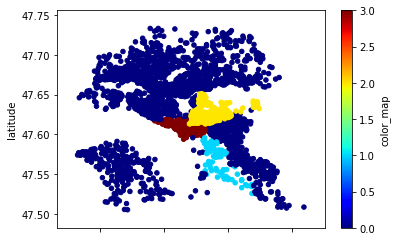

In [797]:
# Copy necessary columns
to_plot = listings_df[['neighbourhood_group_cleansed', 'longitude', 'latitude']].copy()
# Create a new column with a colormap
to_plot['color_map'] = to_plot.apply(color_map, axis='columns')

to_plot.plot.scatter(x='longitude', y='latitude', c='color_map', colormap='jet')

## 2. What are the busiest months for renters?

Here we may produce 2 distributions:
1. number of bookings by month
2. estimated revenues by month

To get the first distribution, we can use `reviews_df`, group the data by month and count records in each group

In [798]:
bookings_by_month = reviews_df['date'].groupby(reviews_df['date'].dt.month).count()

Representing this series by bar plot helps to see the evident trend: second half of the summer and early fall are the busies seasons for hosts

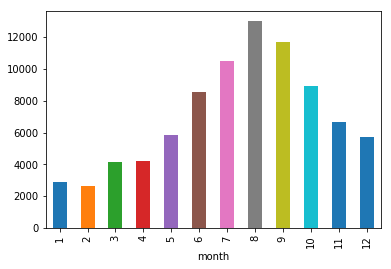

In [799]:
bookings_by_month.index.names =  ['month']
bookings_by_month.plot.bar()

To get the distrubution of estimated revenues by month, we can use the columns `date` and `estimated_revenue` from `bookings_df`dataframe. 
Group by month in `data` and compute sum in each group   

In [800]:
revenue_by_month = bookings_df[['date','estimated_revenue']].groupby(bookings_df["date"].dt.month).sum()
revenue_by_month

,estimated_revenue
date,
1,615071.0
2,737003.0
3,1073391.0
4,1028092.0
5,1755773.0
6,1991564.0
7,2425408.0
8,3153118.0
9,2818165.0


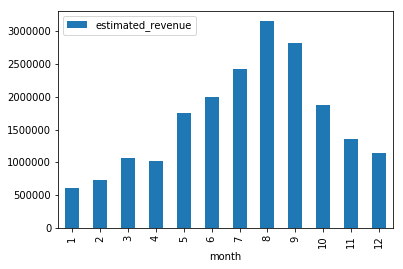

In [801]:
revenue_by_month.index.names =  ['month']
revenue_by_month.plot.bar()

We see that estimated revenues are also maximal in the same period as the number of bookings: second half of the summer and early fall. 

## 3. Predicting Listing Price

Explanatory variables will be stored in `features_df` DataFrame.

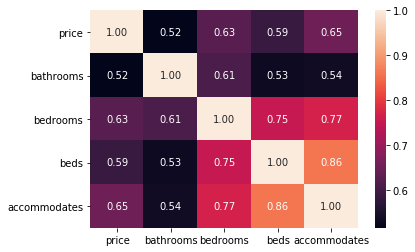

In [802]:
# Let's check covariation matrix for `price` and several "objective" numerical properties of a listing
# ("objective" means it does not depends on somebody's evaluation, like number of bedrooms or bathrooms)
sns.heatmap(listings_df[['price', 'bathrooms', 'bedrooms', 'beds','accommodates']].corr(), annot=True, fmt=".2f");


In [803]:
# Covariation matrix suggest a strong dependence of `price` on selected listing properties
# Hence I include all these data into features_df
# There is a small percent of NaN values; all variables are integer-like, so I use median to impute the missing values 
numerical_cols = ['bathrooms', 'bedrooms', 'beds', 'accommodates']
features_df = listings_df[numerical_cols].apply( lambda col: col.fillna(col.median()) ) 

In [804]:
# Analysis in Part 1 showed the importance of 'neighbourhood_group_cleansed' data.
# These are categorical, so I use one-hot encoding and append the resulting columns to features_df
categorical_cols = ['neighbourhood_group_cleansed']

In [805]:
features_df = pd.concat( [features_df, pd.get_dummies(listings_df[categorical_cols],
                                                     prefix=categorical_cols, 
                                                     prefix_sep='_', 
                                                     drop_first=True, 
                                                    dummy_na=True) ],
                         axis=1) 
                        

In [806]:
# Also I append several True/False columns (encoded 1/0)
for col in tf_columns: 
    features_df[col] = listings_df[col]

In [807]:
# Building the linear regression model and estimating performance

# Split into explanatory and response variables
X = features_df
y = listings_df['price']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state=42) 
       
# Init the model
lm_model = LinearRegression(normalize=True)
# Fit using training data
lm_model.fit(X_train, y_train)

# Estimate preformance using Rsquared metrics
y_train_preds = lm_model.predict(X_train) 
y_test_preds  = lm_model.predict(X_test)

rsquared_score_train = r2_score(y_train, y_train_preds)  
rsquared_score_test  = r2_score(y_test, y_test_preds)  

print("The r-squared train score for linear model is {} on {} values.".format(rsquared_score_train, len(y_train) ))
print("The r-squared test  score for linear model is {} on {} values.".format(rsquared_score, len(y_test)))

The r-squared train score for linear model is 0.5303842280698203 on 2558 values.
The r-squared test  score for linear model is 0.5351660198857086 on 1260 values.


We see that our model has a moderate predicing capability: r-squared ~ 0.5, wich is far from perfect 1.0

On the good side: metrics for train and test data are quite similar, which means that we avoided the overfitting. 

# Conclusions

We were able to introduce an meaningful Estimated Revenue metric and get some important insight from Seattle AirBnB data:

- Rank Seattle neighbourhoods for prospective hosts;
- Get a distribution of revenue by month, which can help the hosts with planning the property maintenance.

Also we created and trained a simple Linear Regression model which can be used for helping the prospevctive buyers to estimate the rental price of their property, depending on several property features (number of bedrooms, bathrooms, beds; how many peoples can be accomodated) and on the neighbourhood, where the property is located. 
